# Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [3]:
df = pd.read_csv('D:\Personal_Github\Regression\Data\Battery_RUL.csv')

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


#### Overview of dataset elements

In [5]:
pd.set_option('display.max_columns', 100)
df.head()  

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


Statistical features of dataset

In [7]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


# Exploratory Data Analysis

In [8]:
df.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

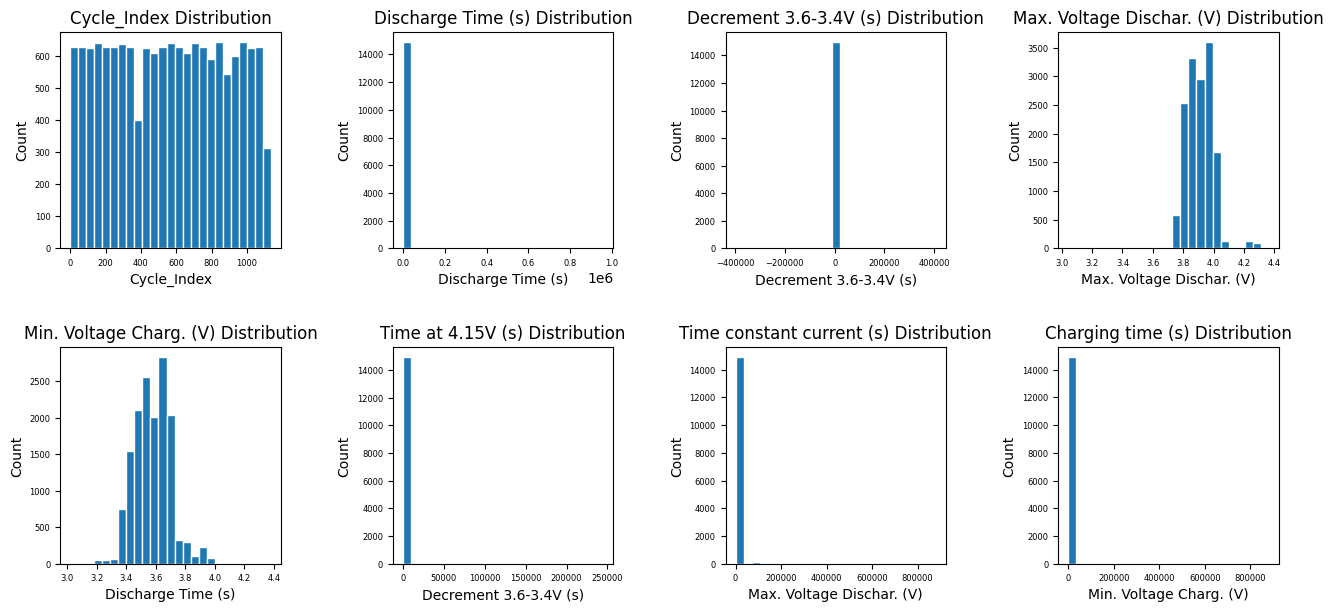

In [9]:
plt_row = 2
plt_col = 4
fig = plt.figure()
fig, axes = plt.subplots(plt_row, plt_col, figsize=(14, 7))
plt.tight_layout(pad = 5)
plt.rc('xtick', labelsize=2)    # legend fontsize

for i in range(plt_row):
    for j in range(plt_col):
        axes[i,j].set_title(df.columns[i*plt_col+j] +" Distribution")
        axes[i,j].set_ylabel('Count')
        axes[i,j].set_xlabel(df.columns[i+j])
        axes[i,j].tick_params(axis='both', which='major', labelsize=6)
        axes[i,j].hist(df.iloc[:,i*plt_col+j], bins=25, edgecolor='white', linewidth=1)  # density=False would make counts

Text(0.5, 0, 'RUL')

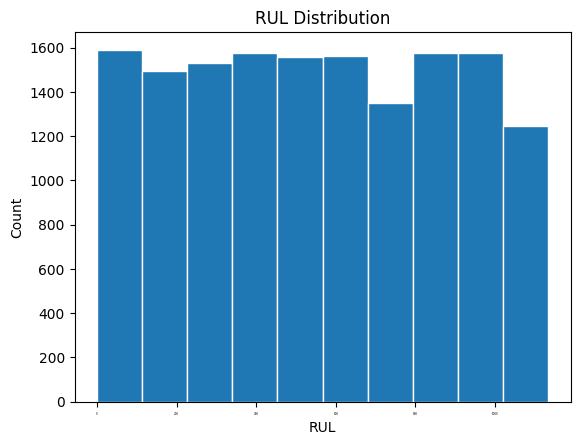

In [10]:
plt.hist(df.iloc[:,-1], bins=10, edgecolor='white', linewidth=1)
plt.title("RUL Distribution")
plt.ylabel('Count')
plt.xlabel('RUL')

<Figure size 640x480 with 0 Axes>

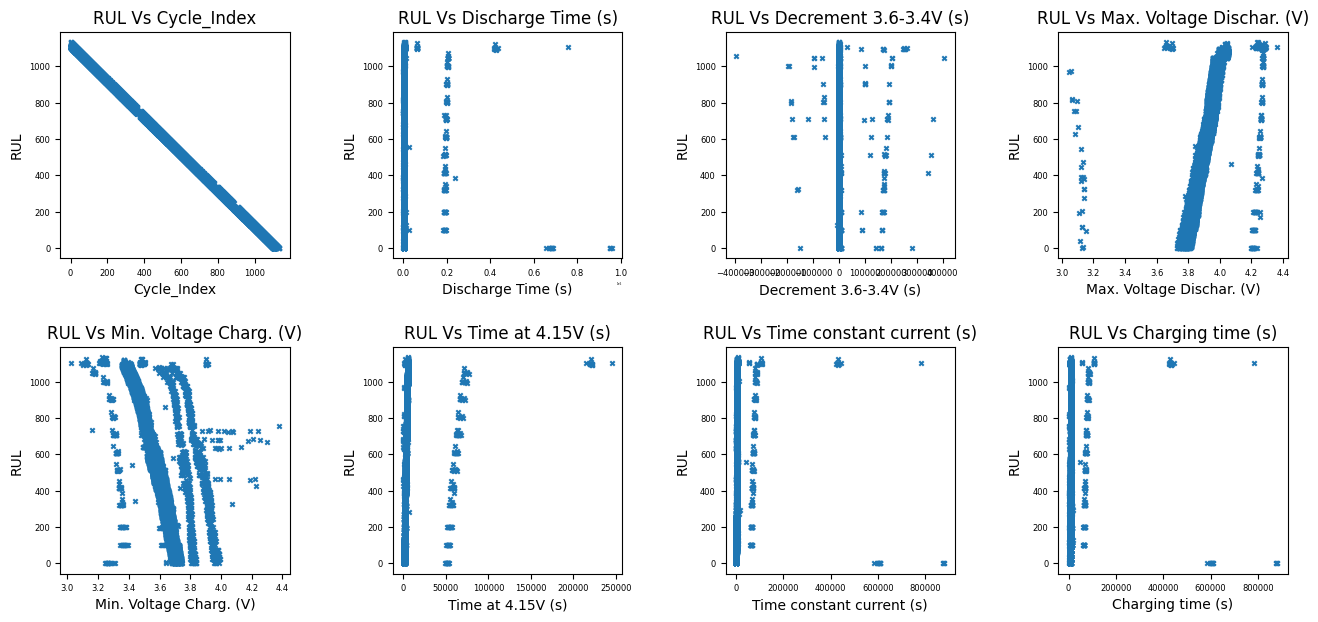

In [11]:
plt_row = 2
plt_col = 4
fig = plt.figure()
fig, axes = plt.subplots(plt_row, plt_col, figsize=(14, 7))
plt.tight_layout(pad = 5)

for i in range(plt_row):
    for j in range(plt_col):
        axes[i,j].set_title("RUL Vs " + df.columns[i*plt_col+j])
        axes[i,j].set_ylabel('RUL')
        axes[i,j].set_xlabel(df.columns[i*plt_col+j])
        axes[i,j].tick_params(axis='both', which='major', labelsize=6)
        axes[i,j].scatter(df.iloc[:,i*plt_col+j], df['RUL'], s=10,marker = "x")  # density=False would make counts
        
plt.show()

<AxesSubplot: >

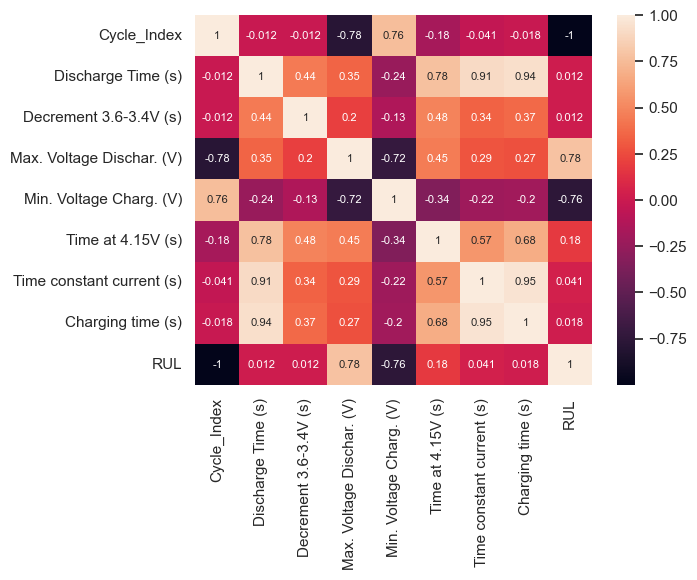

In [12]:
sns.set(font_scale=1)
sns.heatmap(df.corr(), annot = True, annot_kws={"fontsize":8})

### Scatter Matrix

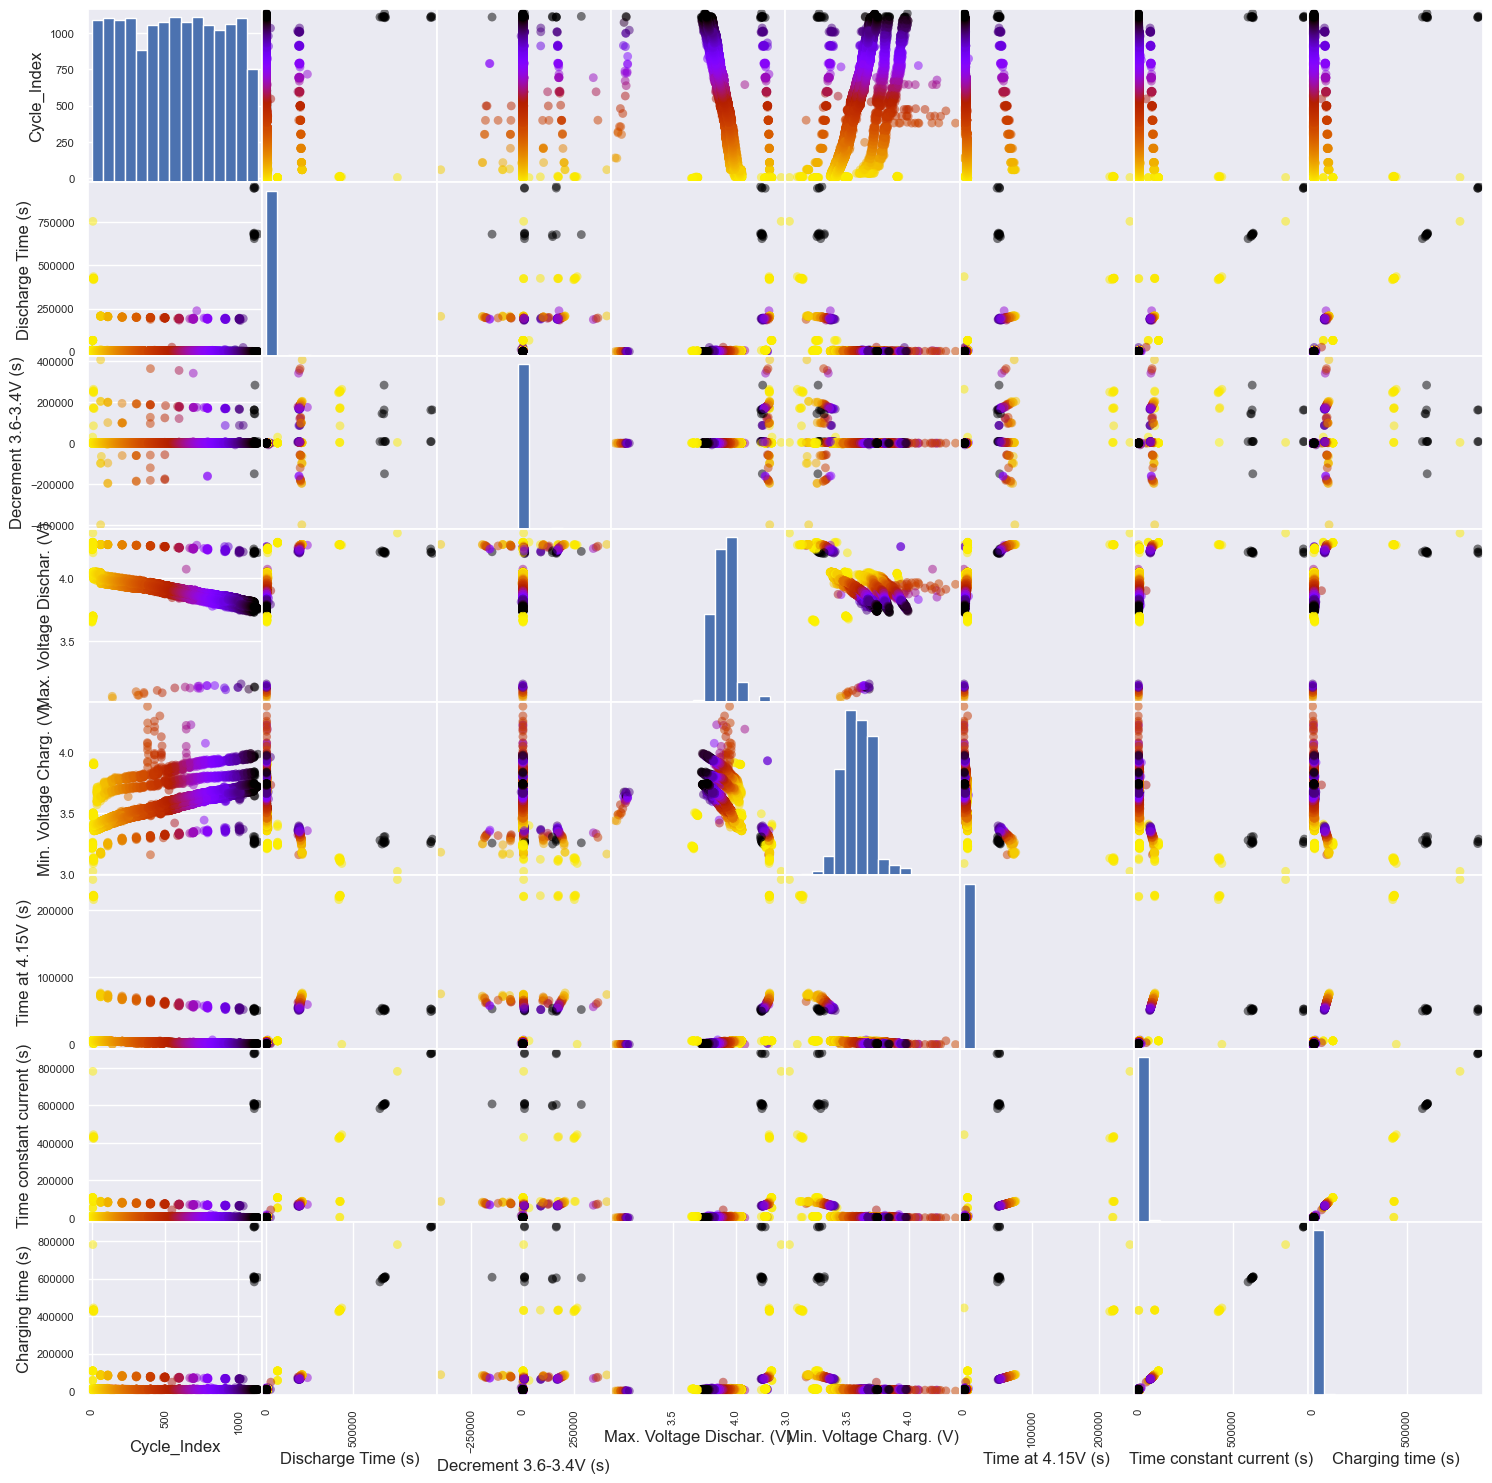

In [13]:
# plotting a scatter matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(df.iloc[:, :-1], c= df.iloc[:, -1], marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(18,18), cmap=cmap)

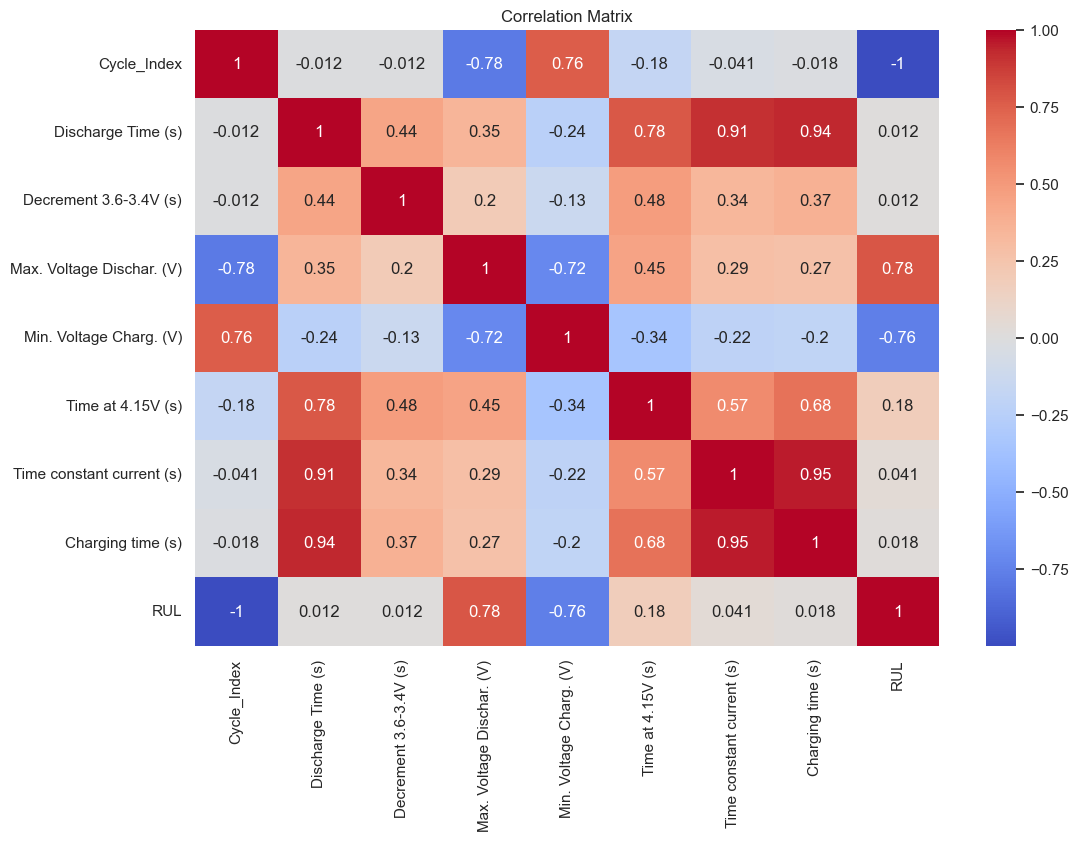

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


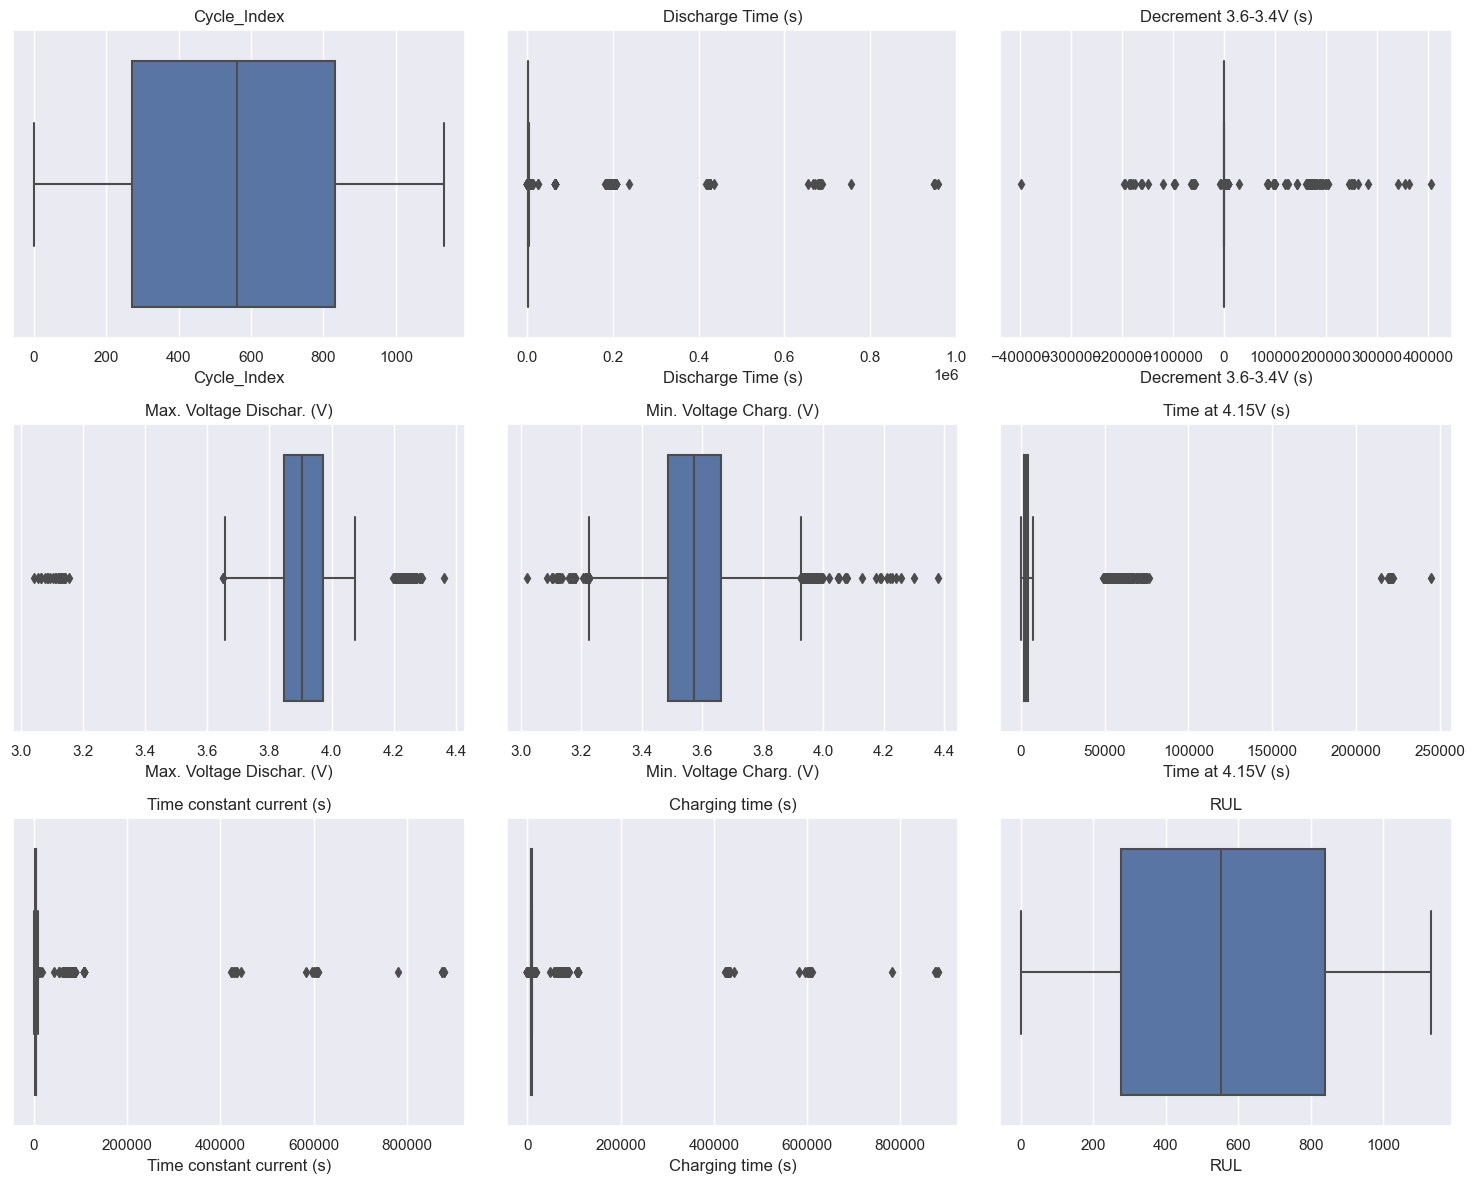

In [15]:
num_columns = len(df.columns)
num_rows = (num_columns + 2) // 3
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*4))  
axs = axs.flatten()

# Iterate over columns and corresponding axes
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axs[i])
    axs[i].set_title(column)

for j in range(i + 1, num_rows * 3):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

# Dataset Preprocessing

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Multiplier for the IQR to define outlier. 
multiplier = 1.5

# Filter out the outliers by keeping only the values that are within the IQR * multiplier.
df = df[~((df < (Q1 - multiplier * IQR)) | (df > (Q3 + multiplier * IQR))).any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14445 entries, 16 to 15062
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                14445 non-null  float64
 1   Discharge Time (s)         14445 non-null  float64
 2   Decrement 3.6-3.4V (s)     14445 non-null  float64
 3   Max. Voltage Dischar. (V)  14445 non-null  float64
 4   Min. Voltage Charg. (V)    14445 non-null  float64
 5   Time at 4.15V (s)          14445 non-null  float64
 6   Time constant current (s)  14445 non-null  float64
 7   Charging time (s)          14445 non-null  float64
 8   RUL                        14445 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.1 MB


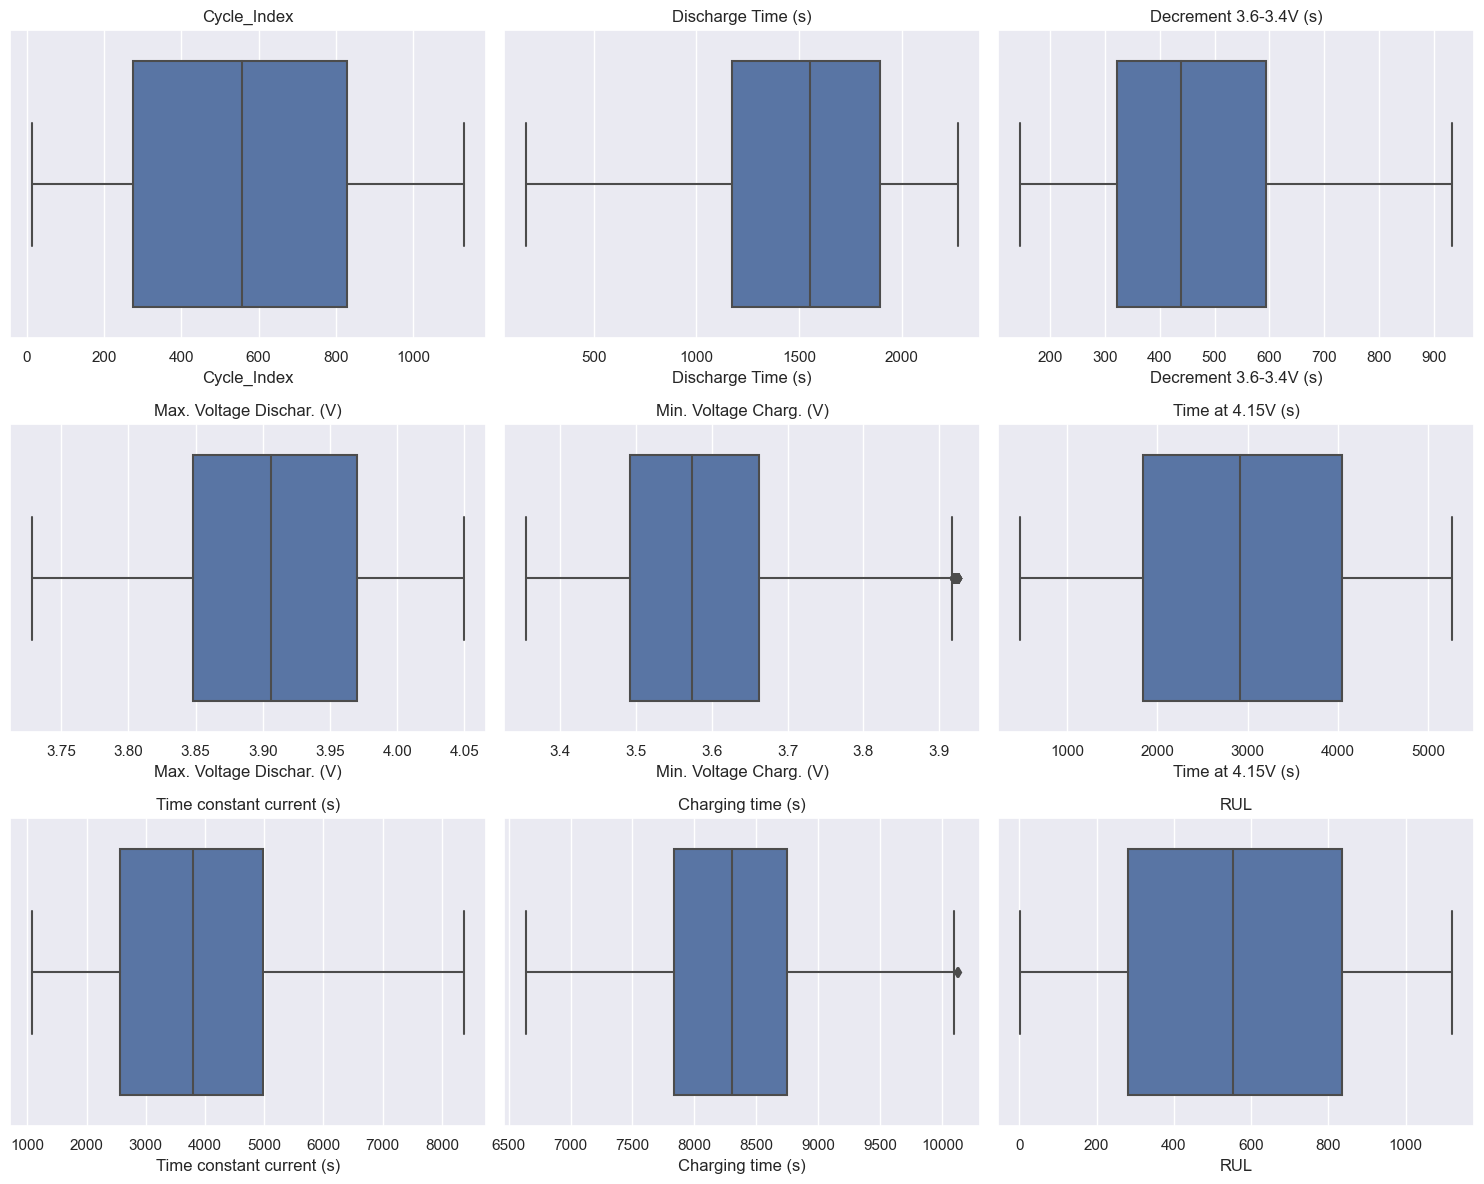

In [17]:
num_columns = len(df.columns)
num_rows = (num_columns + 2) // 3
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*4))  
axs = axs.flatten()

# Iterate over columns and corresponding axes
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axs[i])
    axs[i].set_title(column)

for j in range(i + 1, num_rows * 3):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

## Feature Scaling

In [18]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df.drop('RUL', axis=1)  # Excluding the target variable
df_scaled_array = scaler.fit_transform(features)

# Convert the scaled array back to a DataFrame
df = pd.DataFrame(df_scaled_array, columns=features.columns)

# Train Test Split

In [20]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [21]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Linear Regression

In [22]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the Model Performance
from sklearn.metrics import r2_score, mean_squared_error
lr_r2_score = r2_score(y_test, y_pred)
print("Linear Regression R²:", lr_r2_score)
mse_lr = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse_lr)

Linear Regression R²: 0.8513866986440677
Linear Regression MSE: 0.1455758846379885


# Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(X_test)

# Evaluating the Model Performance
pr_r2_score = r2_score(y_test, y_pred)
print("Polynomial Regression R²:", pr_r2_score)
mse_pr = mean_squared_error(y_test, y_pred)
print("Polynomial Regression MSE:", mse_pr)

Polynomial Regression R²: 0.86061874012516
Polynomial Regression MSE: 0.13653253122774558


# Decision Trees

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)

# Evaluating the Model Performance
dt_r2_score = r2_score(y_test, y_pred)
print("Decision Trees R²:", dt_r2_score)
mse_dt = mean_squared_error(y_test, y_pred)
print("Decision Trees MSE:", mse_dt)

Decision Trees R²: 0.961144838788835
Decision Trees MSE: 0.0380610242451976


# Random Forests

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

# Evaluating the Model Performance
rf_r2_score = r2_score(y_test, y_pred)
print("Random Forest R²:", rf_r2_score)
mse_rf = mean_squared_error(y_test, y_pred)
print("Random Forest MSE:", mse_rf)

Random Forest R²: 0.9778988670449583
Random Forest MSE: 0.021649421364553764


# Support Vector Machines

In [32]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)
y_pred = svr_regressor.predict(X_test)

# Evaluating the Model Performance
svm_r2_score = r2_score(y_test, y_pred)
print("SVM R²:", svm_r2_score)
mse_svm = mean_squared_error(y_test, y_pred)
print("SVM MSE:", mse_svm)

SVM R²: 0.9216224388233046
SVM MSE: 0.07677564995840151


# K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

# Evaluating the Model Performance
knn_r2_score = r2_score(y_test, y_pred)
print("KNN R²:", knn_r2_score)
mse_knn = mean_squared_error(y_test, y_pred)
print("KNN MSE:", mse_knn)

KNN R²: 0.9813748464679521
KNN MSE: 0.01824448536711003


# Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)
y_pred = ridge_regressor.predict(X_test)

# Evaluating the Model Performance
rr_r2_score = r2_score(y_test, y_pred)
print("Ridge Regression R²:", rr_r2_score)
mse_rr = mean_squared_error(y_test, y_pred)
print("Ridge Regression MSE:", mse_rr)

Ridge Regression R²: 0.8513919222014233
Ridge Regression MSE: 0.145570767841739
